# Multi Variate Analysis 
This jupyter python notebook conducts multi variate analysis relevant to the research question. The research question is as follows: <br>
<br>
How different variables such as **actual delivery time**, **the difference between actual and estimated wait time**, **freight value**, **payment value**, **payment installment** affect the **review score** in each of the different **product type categories**, `Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`? <br>

### Decision Tree
A decision tree uses different numerical variables to classify the review score into the two classes 1 and 0. 

### Extracting the necessary CSVs provided

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

### Merging the Datasets

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_payments_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_items_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_products_dataset, on="product_id", how = 'left')

### Removing Duplicates and extracting needed variables 

In [4]:
olist_merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [5]:
olist_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99650 non-null  object 
 1   customer_id                    99650 non-null  object 
 2   order_status                   99650 non-null  object 
 3   order_purchase_timestamp       99650 non-null  object 
 4   order_approved_at              99490 non-null  object 
 5   order_delivered_carrier_date   97860 non-null  object 
 6   order_delivered_customer_date  96672 non-null  object 
 7   order_estimated_delivery_date  99650 non-null  object 
 8   review_id                      99650 non-null  object 
 9   review_score                   99650 non-null  int64  
 10  review_comment_title           11704 non-null  object 
 11  review_comment_message         41646 non-null  object 
 12  review_creation_date           99650 non-null

In [6]:
dataAnalysis = pd.DataFrame(olist_merge[['order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'payment_installments', 'payment_value', 'freight_value', 'product_category_name']])

In [7]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   99650 non-null  object 
 1   order_purchase_timestamp       99650 non-null  object 
 2   order_approved_at              99490 non-null  object 
 3   order_delivered_customer_date  96672 non-null  object 
 4   order_estimated_delivery_date  99650 non-null  object 
 5   review_score                   99650 non-null  int64  
 6   payment_installments           99649 non-null  float64
 7   payment_value                  99649 non-null  float64
 8   freight_value                  98874 non-null  float64
 9   product_category_name          97454 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [8]:
# Creating a list of the time related variables 
time = ["order_purchase_timestamp","order_estimated_delivery_date","order_delivered_customer_date", "order_approved_at"]
# Changing the time related variables to datetime format using the list 
for column in time:
    dataAnalysis.loc[:, column] = pd.to_datetime(dataAnalysis[column])

In [9]:
# Calculating the actual wait time    
dataAnalysis.loc[:,"actual_wait_time"] = (dataAnalysis['order_delivered_customer_date']-dataAnalysis['order_purchase_timestamp']).dt.days

In [10]:
# Calculating the estimated wait time 
dataAnalysis.loc[:,"estimated_wait_time"] = (dataAnalysis['order_estimated_delivery_date']-dataAnalysis['order_purchase_timestamp']).dt.days

In [11]:
#Actual minus estimated wait time 
dataAnalysis.loc[:,"actualxestimated"] = (dataAnalysis['actual_wait_time']-dataAnalysis['estimated_wait_time'])

In [12]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_status                   99650 non-null  object        
 1   order_purchase_timestamp       99650 non-null  datetime64[ns]
 2   order_approved_at              99490 non-null  datetime64[ns]
 3   order_delivered_customer_date  96672 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99650 non-null  datetime64[ns]
 5   review_score                   99650 non-null  int64         
 6   payment_installments           99649 non-null  float64       
 7   payment_value                  99649 non-null  float64       
 8   freight_value                  98874 non-null  float64       
 9   product_category_name          97454 non-null  object        
 10  actual_wait_time               96672 non-null  float64       
 11  estimated_wait

In [13]:
dataAnalysis.drop(columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'estimated_wait_time'], inplace = True)

In [14]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_status           99650 non-null  object 
 1   review_score           99650 non-null  int64  
 2   payment_installments   99649 non-null  float64
 3   payment_value          99649 non-null  float64
 4   freight_value          98874 non-null  float64
 5   product_category_name  97454 non-null  object 
 6   actual_wait_time       96672 non-null  float64
 7   actualxestimated       96672 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.8+ MB


### Further analysis of predictors
Categorical types: Order Status
<br>
Numerical types: payment installments, payment value, freight value, actual wait time, actualxestimated 

When conducting multi variate analysis, it is important to know which variables are categorical and which are numerical. 

The numerical types are dependent on the order status being delivered. Hence, it needs to be filtered. 

In [15]:
dataAnalysis = dataAnalysis.loc[(dataAnalysis["order_status"]=="delivered")]

In [16]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 119150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_status           96674 non-null  object 
 1   review_score           96674 non-null  int64  
 2   payment_installments   96673 non-null  float64
 3   payment_value          96673 non-null  float64
 4   freight_value          96674 non-null  float64
 5   product_category_name  95312 non-null  object 
 6   actual_wait_time       96666 non-null  float64
 7   actualxestimated       96666 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ MB


### Class balancing for review score into low and high review score 
Review score 1 and 2 classified as low (0) <br>
Review score 3 to 5 classified as high (1)

This is to reduce the class imbalance seen. 
Additionally, based on the predictor single variate analysis done this split seems best. 

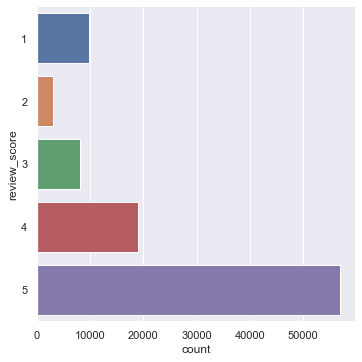

In [17]:
sb.catplot(y = "review_score", data = dataAnalysis, kind = "count")

In [18]:
# Calculating the actual wait time    
dataAnalysis.loc[:,"reviewscore"] = dataAnalysis["review_score"]//4

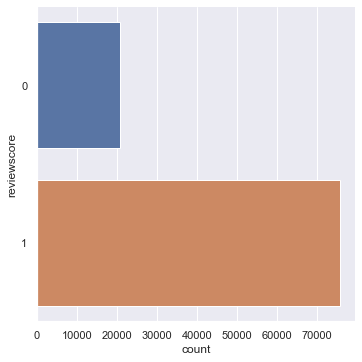

In [19]:
sb.catplot(y = "reviewscore", data = dataAnalysis, kind = "count")

In [20]:
dataAnalysis.drop(columns = ['review_score'], inplace = True)

#### Next, narrowing down to the top ten products
`Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`

In [21]:
#merging with english name first 
dataAnalysis = pd.merge(dataAnalysis,product_category_name_translation,how="left",on="product_category_name")

In [22]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   96674 non-null  object 
 1   payment_installments           96673 non-null  float64
 2   payment_value                  96673 non-null  float64
 3   freight_value                  96674 non-null  float64
 4   product_category_name          95312 non-null  object 
 5   actual_wait_time               96666 non-null  float64
 6   actualxestimated               96666 non-null  float64
 7   reviewscore                    96674 non-null  int64  
 8   product_category_name_english  95293 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.4+ MB


In [23]:
# No further cleaning required 
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
housewareProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="housewares")]
housewareProd.info()

def balancing(dataframe):
    # Class count
    review_class_1, review_class_0 = dataframe.reviewscore.value_counts()

    # Divide by class
    df_review_0 = dataframe[dataframe['reviewscore'] == 0]
    df_review_1 = dataframe[dataframe['reviewscore'] == 1]

    df_review_0_over = df_review_0.sample(review_class_1, replace=True)
    dataframe = pd.concat([df_review_1, df_review_0_over], axis=0)
    return dataframe

housewareProd = balancing(housewareProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694 entries, 0 to 96662
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   5694 non-null   object 
 1   payment_installments           5694 non-null   float64
 2   payment_value                  5694 non-null   float64
 3   freight_value                  5694 non-null   float64
 4   product_category_name          5694 non-null   object 
 5   actual_wait_time               5694 non-null   float64
 6   actualxestimated               5694 non-null   float64
 7   reviewscore                    5694 non-null   int64  
 8   product_category_name_english  5694 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 444.8+ KB


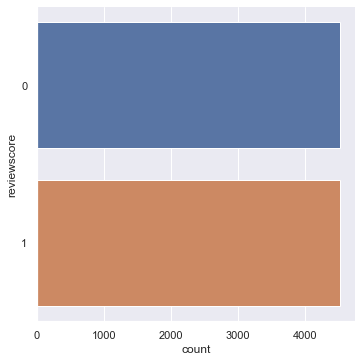

In [24]:
sb.catplot(y = "reviewscore", data = housewareProd, kind = "count")

In [25]:
autoProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="auto")]
autoProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 2 to 96645
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   3797 non-null   object 
 1   payment_installments           3797 non-null   float64
 2   payment_value                  3797 non-null   float64
 3   freight_value                  3797 non-null   float64
 4   product_category_name          3797 non-null   object 
 5   actual_wait_time               3796 non-null   float64
 6   actualxestimated               3796 non-null   float64
 7   reviewscore                    3797 non-null   int64  
 8   product_category_name_english  3797 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 296.6+ KB


In [26]:
#Needs cleaning and removal of null values 
autoProd = autoProd.loc[(autoProd["actual_wait_time"].notnull())]
autoProd.info()
autoProd=balancing(autoProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 2 to 96645
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   3796 non-null   object 
 1   payment_installments           3796 non-null   float64
 2   payment_value                  3796 non-null   float64
 3   freight_value                  3796 non-null   float64
 4   product_category_name          3796 non-null   object 
 5   actual_wait_time               3796 non-null   float64
 6   actualxestimated               3796 non-null   float64
 7   reviewscore                    3796 non-null   int64  
 8   product_category_name_english  3796 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 296.6+ KB


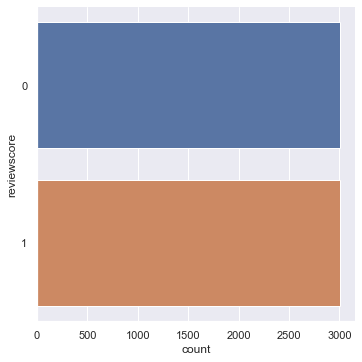

In [27]:
sb.catplot(y = "reviewscore", data = autoProd, kind = "count")

In [28]:
#No need further cleaning
furnitureProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="furniture_decor")]
furnitureProd.info()

furnitureProd = balancing(furnitureProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238 entries, 7 to 96668
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6238 non-null   object 
 1   payment_installments           6238 non-null   float64
 2   payment_value                  6238 non-null   float64
 3   freight_value                  6238 non-null   float64
 4   product_category_name          6238 non-null   object 
 5   actual_wait_time               6238 non-null   float64
 6   actualxestimated               6238 non-null   float64
 7   reviewscore                    6238 non-null   int64  
 8   product_category_name_english  6238 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 487.3+ KB


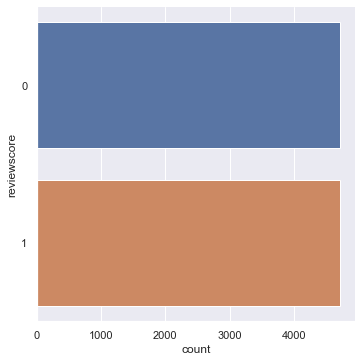

In [29]:
sb.catplot(y = "reviewscore", data = furnitureProd, kind = "count")

In [30]:
CompAcProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="computers_accessories")]
CompAcProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6522 entries, 10 to 96672
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6522 non-null   object 
 1   payment_installments           6522 non-null   float64
 2   payment_value                  6522 non-null   float64
 3   freight_value                  6522 non-null   float64
 4   product_category_name          6522 non-null   object 
 5   actual_wait_time               6521 non-null   float64
 6   actualxestimated               6521 non-null   float64
 7   reviewscore                    6522 non-null   int64  
 8   product_category_name_english  6522 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 509.5+ KB


In [31]:
#Needs cleaning and removal of null values 
CompAcProd = CompAcProd.loc[(CompAcProd["actual_wait_time"].notnull())]
CompAcProd.info()
CompAcProd=balancing(CompAcProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6521 entries, 10 to 96672
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6521 non-null   object 
 1   payment_installments           6521 non-null   float64
 2   payment_value                  6521 non-null   float64
 3   freight_value                  6521 non-null   float64
 4   product_category_name          6521 non-null   object 
 5   actual_wait_time               6521 non-null   float64
 6   actualxestimated               6521 non-null   float64
 7   reviewscore                    6521 non-null   int64  
 8   product_category_name_english  6521 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 509.5+ KB


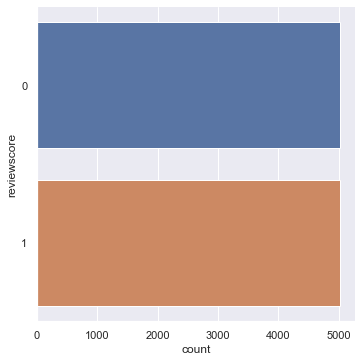

In [32]:
sb.catplot(y = "reviewscore", data = CompAcProd, kind = "count")

In [33]:
healthProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="health_beauty")]
healthProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 19 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   8621 non-null   object 
 1   payment_installments           8620 non-null   float64
 2   payment_value                  8620 non-null   float64
 3   freight_value                  8621 non-null   float64
 4   product_category_name          8621 non-null   object 
 5   actual_wait_time               8621 non-null   float64
 6   actualxestimated               8621 non-null   float64
 7   reviewscore                    8621 non-null   int64  
 8   product_category_name_english  8621 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 673.5+ KB


In [34]:
#Needs further cleaning 
healthProd = healthProd.loc[(healthProd["payment_installments"].notnull())]
healthProd.info()
healthProd=balancing(healthProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 19 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   8620 non-null   object 
 1   payment_installments           8620 non-null   float64
 2   payment_value                  8620 non-null   float64
 3   freight_value                  8620 non-null   float64
 4   product_category_name          8620 non-null   object 
 5   actual_wait_time               8620 non-null   float64
 6   actualxestimated               8620 non-null   float64
 7   reviewscore                    8620 non-null   int64  
 8   product_category_name_english  8620 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 673.4+ KB


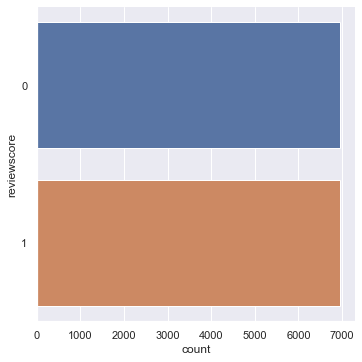

In [35]:
sb.catplot(y = "reviewscore", data = healthProd, kind = "count")

In [36]:
sportsProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="sports_leisure")]
sportsProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7504 entries, 41 to 96663
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   7504 non-null   object 
 1   payment_installments           7504 non-null   float64
 2   payment_value                  7504 non-null   float64
 3   freight_value                  7504 non-null   float64
 4   product_category_name          7504 non-null   object 
 5   actual_wait_time               7503 non-null   float64
 6   actualxestimated               7503 non-null   float64
 7   reviewscore                    7504 non-null   int64  
 8   product_category_name_english  7504 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 586.2+ KB


In [37]:
#Needs further cleaning 
sportsProd = sportsProd.loc[(sportsProd["actual_wait_time"].notnull())]
sportsProd.info()
sportsProd=balancing(sportsProd)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 41 to 96663
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   7503 non-null   object 
 1   payment_installments           7503 non-null   float64
 2   payment_value                  7503 non-null   float64
 3   freight_value                  7503 non-null   float64
 4   product_category_name          7503 non-null   object 
 5   actual_wait_time               7503 non-null   float64
 6   actualxestimated               7503 non-null   float64
 7   reviewscore                    7503 non-null   int64  
 8   product_category_name_english  7503 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 586.2+ KB


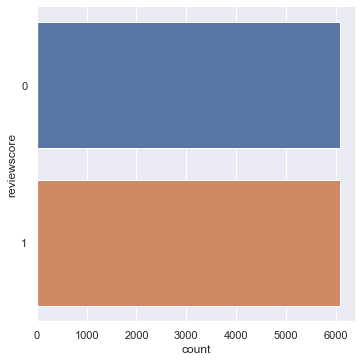

In [38]:
sb.catplot(y = "reviewscore", data = sportsProd, kind = "count")

#### Desicion tree on the product types 
`Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`

In [39]:
#https://scikit-learn.org/stable/modules/tree.html
def train_and_predict(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['reviewscore'])
    X = pd.DataFrame(dataframe[["payment_installments", "payment_value", "freight_value", "actual_wait_time", "actualxestimated"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
    # Assuming each variable takes one depth, it would take 5 depths in total
    # Then give it one more depth to better classify
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    from sklearn.tree import export_graphviz
    treedot = export_graphviz(dectree, feature_names = X_train.columns, out_file = None, filled = True, rounded = True, special_characters = True,class_names= ["0", "1", "2", "3", "4", "5"])
    import graphviz
    from IPython.display import display
    display(graphviz.Source(treedot))

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model: Train Dataset")
    print("Classification Accuracy : ", dectree.score(X_train, y_train))
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    TN = confusion_matrix_train[0,0]
    TP = confusion_matrix_train[1,1]
    FP = confusion_matrix_train[0,1]
    FN = confusion_matrix_train[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ", FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model: Test Dataset")
    print("Classification Accuracy : ", dectree.score(X_test, y_test))
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    TN = confusion_matrix_test[0,0]
    TP = confusion_matrix_test[1,1]
    FP = confusion_matrix_test[0,1]
    FN = confusion_matrix_test[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ",FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap="Reds")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Reds")

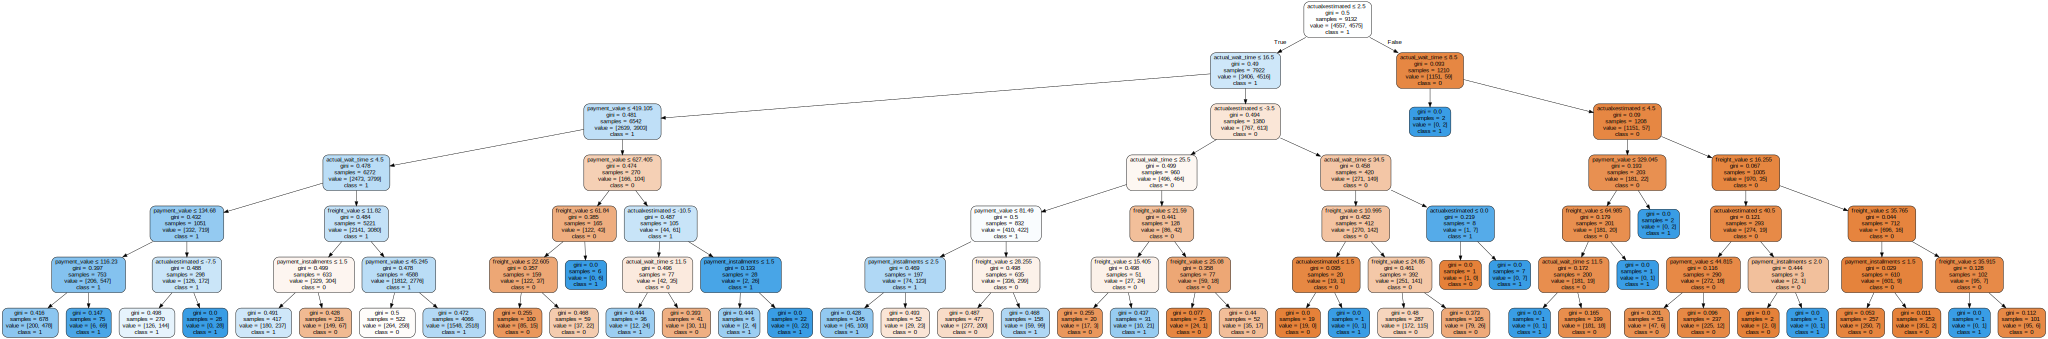

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.6718134034165572
True Negative Rate      :  0.5198595567259162
True Positive Rate      :  0.8231693989071038
False Negative Rate     :  0.17683060109289617
False Positive Rate     :  0.48014044327408384

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.65473061760841
True Negative Rate      :  0.4996734160679295
True Positive Rate      :  0.8116325181758096
False Negative Rate     :  0.18836748182419036
False Positive Rate     :  0.5003265839320705


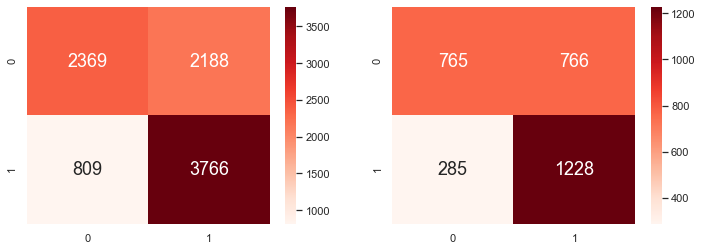

In [40]:
train_and_predict(sportsProd)

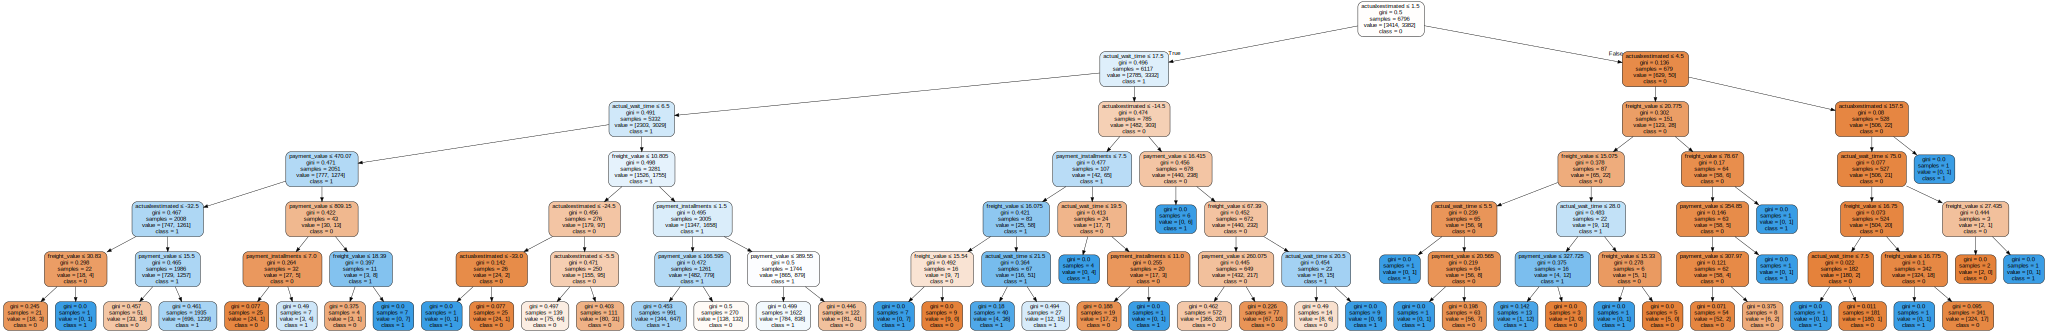

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.64832254267216
True Negative Rate      :  0.45987111892208554
True Positive Rate      :  0.8385570668243643
False Negative Rate     :  0.1614429331756357
False Positive Rate     :  0.5401288810779145

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.6306266548984996
True Negative Rate      :  0.4404655326768129
True Positive Rate      :  0.8154917319408181
False Negative Rate     :  0.18450826805918188
False Positive Rate     :  0.5595344673231871


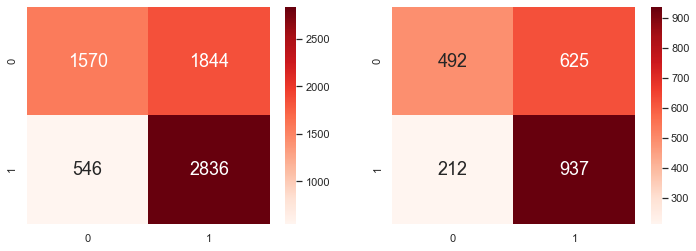

In [41]:
train_and_predict(housewareProd)

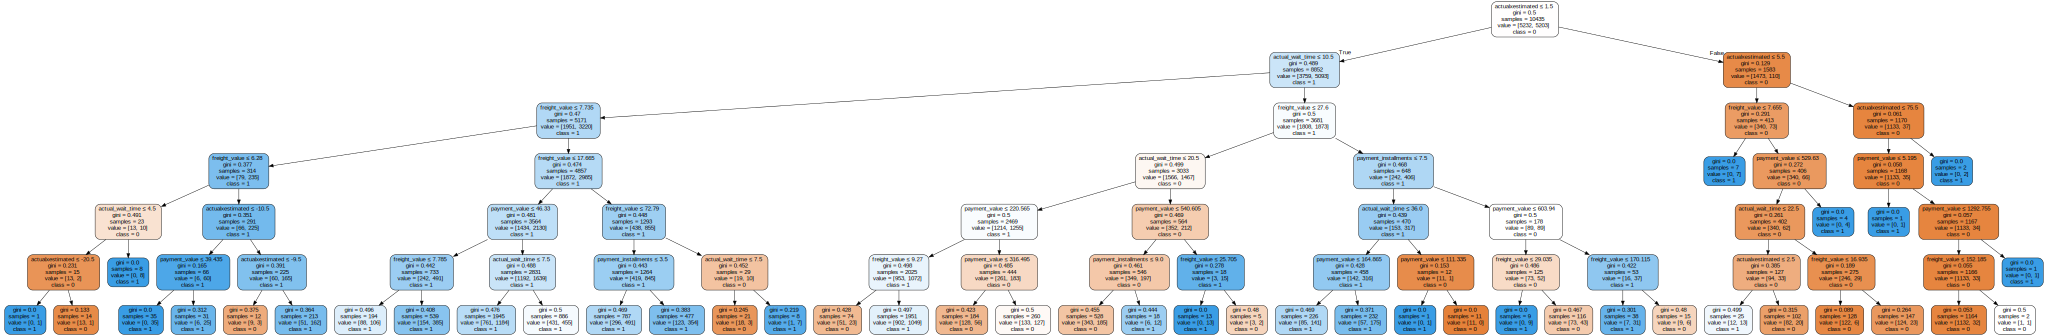

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.6635361763296598
True Negative Rate      :  0.4304281345565749
True Positive Rate      :  0.8979434941379973
False Negative Rate     :  0.1020565058620027
False Positive Rate     :  0.5695718654434251

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.6625467088243748
True Negative Rate      :  0.4481159420289855
True Positive Rate      :  0.8734321550741163
False Negative Rate     :  0.1265678449258837
False Positive Rate     :  0.5518840579710145


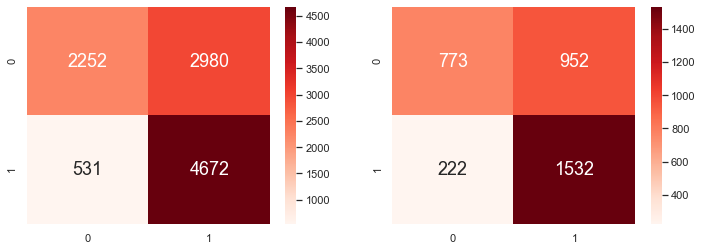

In [42]:
train_and_predict(healthProd)

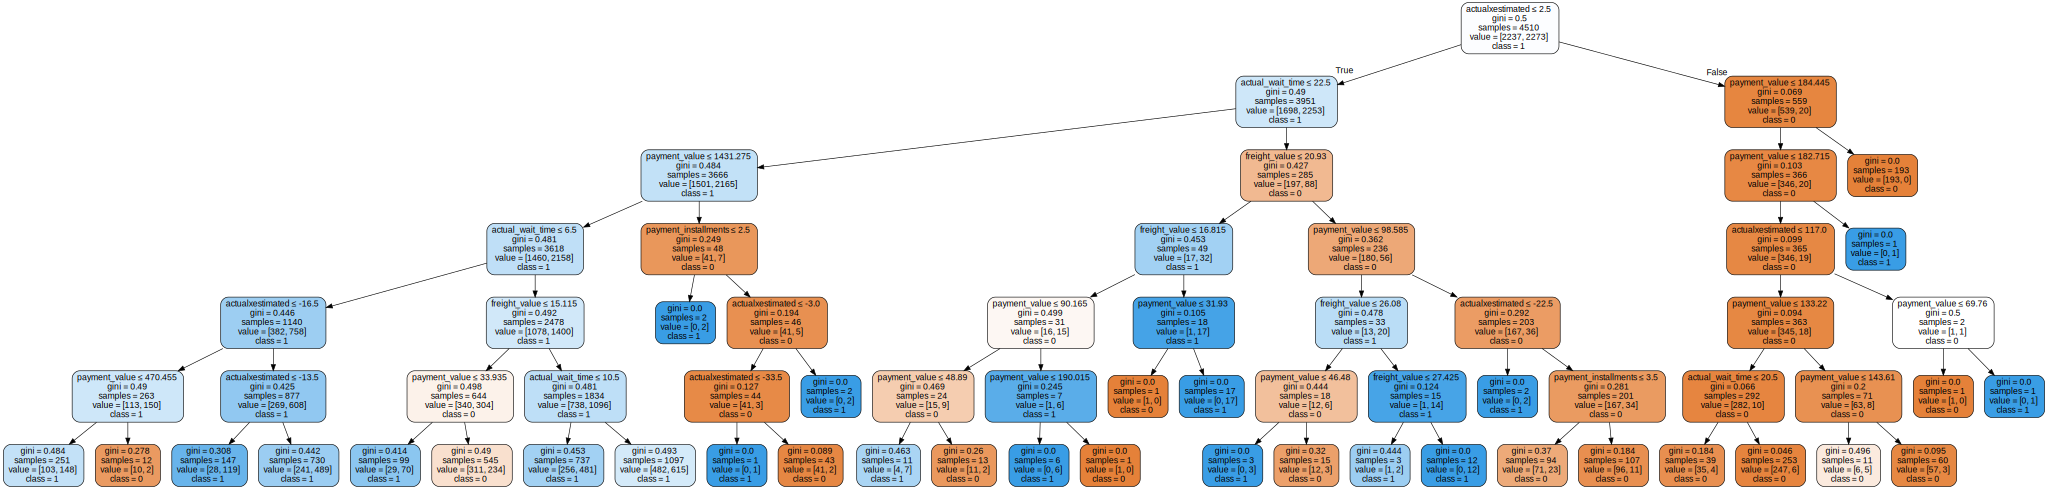

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.6809312638580931
True Negative Rate      :  0.4886008046490836
True Positive Rate      :  0.8702155741311043
False Negative Rate     :  0.12978442586889574
False Positive Rate     :  0.5113991953509164

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.6382978723404256
True Negative Rate      :  0.4649350649350649
True Positive Rate      :  0.8201634877384196
False Negative Rate     :  0.17983651226158037
False Positive Rate     :  0.535064935064935


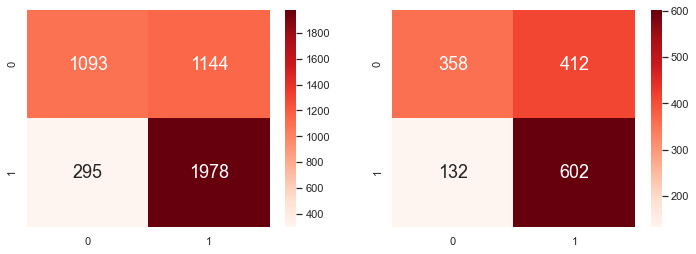

In [43]:
train_and_predict(autoProd)

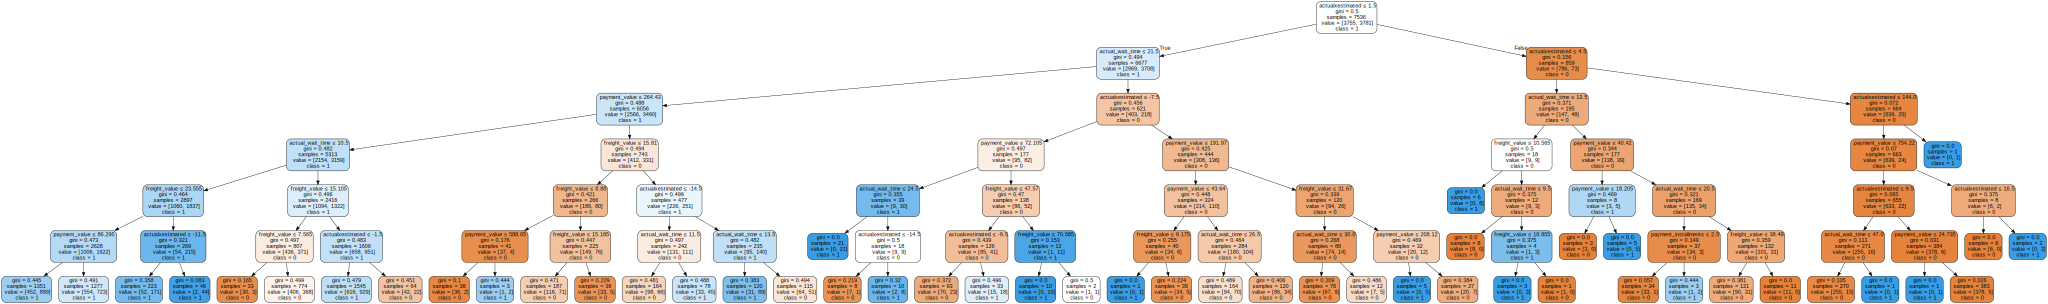

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.6610934182590233
True Negative Rate      :  0.5315579227696405
True Positive Rate      :  0.7897381645067443
False Negative Rate     :  0.21026183549325575
False Positive Rate     :  0.4684420772303595

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.6305732484076433
True Negative Rate      :  0.48936170212765956
True Positive Rate      :  0.7747385358004827
False Negative Rate     :  0.2252614641995173
False Positive Rate     :  0.5106382978723404


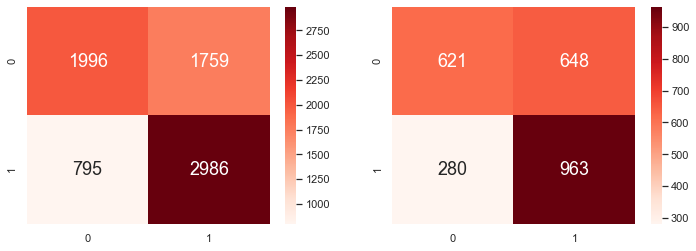

In [44]:
train_and_predict(CompAcProd)

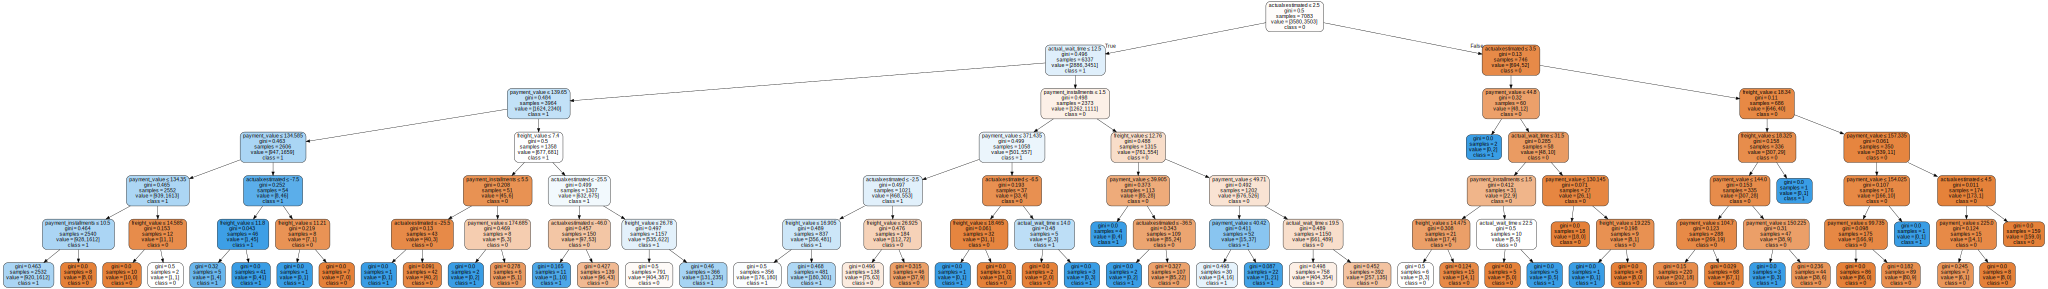

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.6498658760412255
True Negative Rate      :  0.6022346368715084
True Positive Rate      :  0.6985441050528118
False Negative Rate     :  0.3014558949471881
False Positive Rate     :  0.39776536312849164

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.6116052520118593
True Negative Rate      :  0.5674255691768827
True Positive Rate      :  0.6529942575881871
False Negative Rate     :  0.347005742411813
False Positive Rate     :  0.43257443082311736


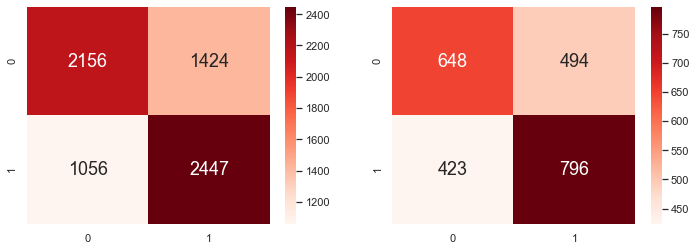

In [45]:
train_and_predict(furnitureProd)

# Check Point: Analysis 
A decision tree was used for multi variate analysis after order status was set to delivered. The classification accuracy was above 65% for most product types. Additionally false positive rate was below 50% for most product types. When class was not balanced, the classification accuracy was above 75% but the false positive rates was above 70%. 

False positive rate should not be high because when the predictors are meant to give low review, the sellers would be misguided and they will assume that they will get a higher review score. 

When using the decision tree, the class with review score 0 had to be over sampled. This can lead to inaccuracies in the prediction.